In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

13239
4320


In [ ]:
#Read the data present in dataset
dataset= pd.read_csv('earthquake.csv')
#Using data.head() we can see the top 5 rows of the dataset
data.head()

In [ ]:
#partitioning feature and target

x=dataset.iloc[:, [2,3]].values
y=dataset.iloc[:,8].values

#We will split train and test the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.25,random_state=0)


#We will make the standard format

from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.fit_transform(x_test)
one=0
zero=0
for i in range(0,len(y_train)):
    if(y_train[i]>6.0):
        y_train[i]=1
        one=one+1
    else:
        y_train[i]=0
        zero=zero+1

for i in range(0,len(y_test)):
    if(y_test[i]>6.0):
        y_test[i]=1
    else:
        y_test[i]=0
print(zero)
print(one)

# Prediction Algorithms:

# 1. Random Forest Classifier

In [3]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(x_train,y_train)

#Let's predict the chances of earthquakes
y_predict= classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_predict)
print(cm)
print(accuracy_score(y_test,y_predict))

[[3878  521]
 [1275  179]]
0.693148812574748


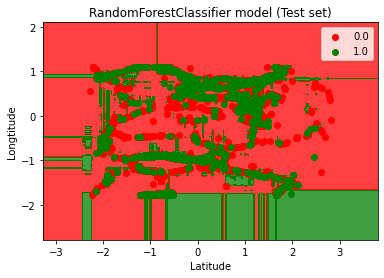

In [4]:

#Let's draw it on a map first
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)


plt.title('RandomForestClassifier model (Test set)')
plt.xlabel('Latitude')
plt.ylabel('Longtitude')
plt.legend()
plt.show()




# 2. KNN Classifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

#Let's predict the chances of earthquakes
y_predict= classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_predict)
print(cm)
print(accuracy_score(y_test,y_predict))

[[3852  547]
 [1268  186]]
0.6899026140440799


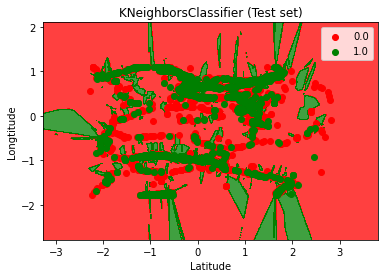

In [6]:

#Let's draw this too

from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)


plt.title('KNeighborsClassifier (Test set)')
plt.xlabel('Latitude')
plt.ylabel('Longtitude')
plt.legend()
plt.show()




# 3. Decision Tree Classifier

In [7]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

#Let's predict the chances of earthquakes
y_predict= classifier.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_predict)
print(cm)
print(accuracy_score(y_test,y_predict))

[[3289 1110]
 [1094  360]]
0.6234409704425081


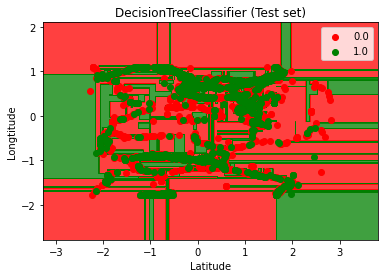

In [8]:

#Let's draw it out

from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)


plt.title('DecisionTreeClassifier (Test set)')
plt.xlabel('Latitude')
plt.ylabel('Longtitude')
plt.legend()
plt.show()




# Comparing all the prediction models

In [10]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))

names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0   RF  0.696053
1  KNN  0.689903
2   DT  0.618315


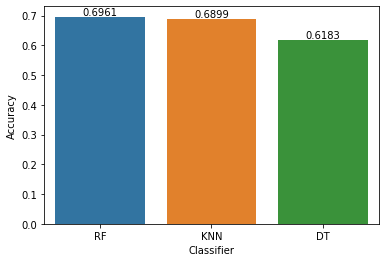

In [11]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()